**Gabriel Bueno Guimarães**


Ao fazer uma análise exploratória dos dataset proposto, pode-se, em um primeiro momento, concluir visualmente que existem uma grande quantidade de filmes que possuem notas médias entre 3 e cerca de 4.3 , sendo que, filmes do gênero comédia se apresentam em maior número , seguido por Drama , Ação e Aventura.

Através da exploração desses dados, pode-se inferir que , dificilmente, em um plano real, datasets terão distribuições normais perfeitas , e que, na verdade, pode-se encontrar distribuições próximas as normais, o que não foi o caso do dataset do MovieLens.

Ainda assim, apesar das análises visuais , a função de correlação do Pandas traz à tona o fato  de que  existe uma correlação positiva, mesmo que não tão expressiva,  entre a nota média e filmes dos gêneros Drama e Crime.




## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.3
Usando seaborn 0.9.0
Usando scipy 1.3.3


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId","titulo","generos"]
filmes.set_index("filmeId",inplace = True)

In [0]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [0]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [0]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId","filmeId","nota","momento"]

In [0]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
nota_media = notas.groupby(by= "filmeId").mean().nota
filmes["nota_media"]= nota_media

In [0]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [0]:
# solução para calcular o total de votos por filme
total_de_votos = notas["filmeId"].value_counts().sort_index()
total_de_votos

1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: filmeId, Length: 9724, dtype: int64

In [0]:
# solução para criar a nova coluna e filtrar os filmes
filmes["total_de_votos"] = total_de_votos
seletor = filmes.query("total_de_votos<50").index
filmes.drop(labels = seletor, axis = 0, inplace = True)
filmes.dropna(inplace = True)

In [0]:
filmes.head()


,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0, 0.5, 'Densidade')

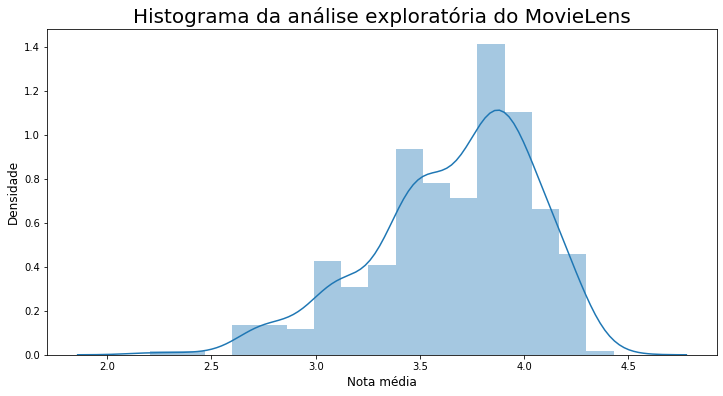

In [0]:
ax = sns.distplot(filmes["nota_media"])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma da análise exploratória do MovieLens",fontsize = 20)
ax.set_xlabel("Nota média",fontsize = 12)
ax.set_ylabel("Densidade",fontsize = 12)

Text(0, 0.5, 'Densidade')

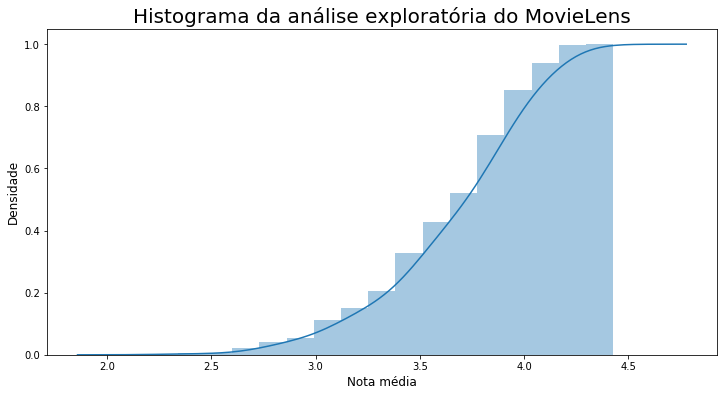

In [0]:
# solução cumulativa
ax = sns.distplot(filmes["nota_media"],hist_kws={"cumulative":True}, kde_kws = {"cumulative":True})
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma da análise exploratória do MovieLens",fontsize = 20)
ax.set_xlabel("Nota média",fontsize = 12)
ax.set_ylabel("Densidade",fontsize = 12)



## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0, 0.5, 'Densidade')

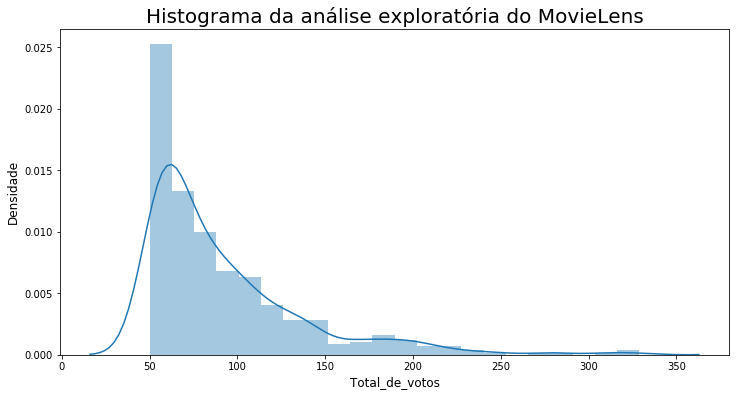

In [0]:
# solução histograma
ax = sns.distplot(filmes["total_de_votos"])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma da análise exploratória do MovieLens",fontsize = 20)
ax.set_xlabel("Total_de_votos",fontsize = 12)
ax.set_ylabel("Densidade",fontsize = 12)

Text(0, 0.5, 'Densidade')

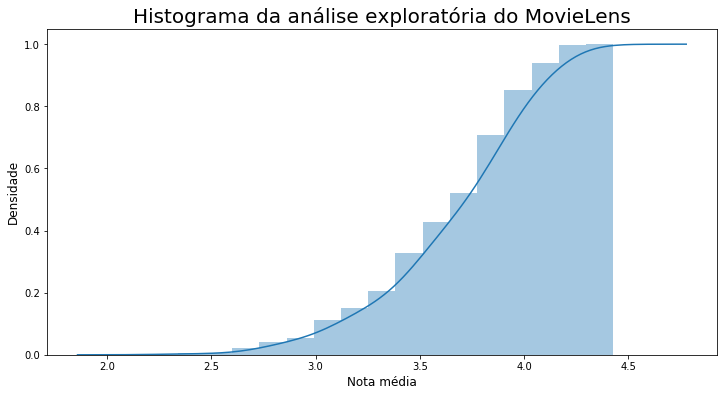

In [0]:
# solução cumulativa
ax = sns.distplot(filmes["nota_media"], hist_kws={"cumulative": True}, kde_kws ={"cumulative": True})
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma da análise exploratória do MovieLens",fontsize = 20)
ax.set_xlabel("Nota média",fontsize = 12)
ax.set_ylabel("Densidade",fontsize = 12)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento = filmes["nota_media"].quantile(q=0.2)
nota_limite_dos_20_porcento

3.3742857142857146

In [0]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [0]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [0]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

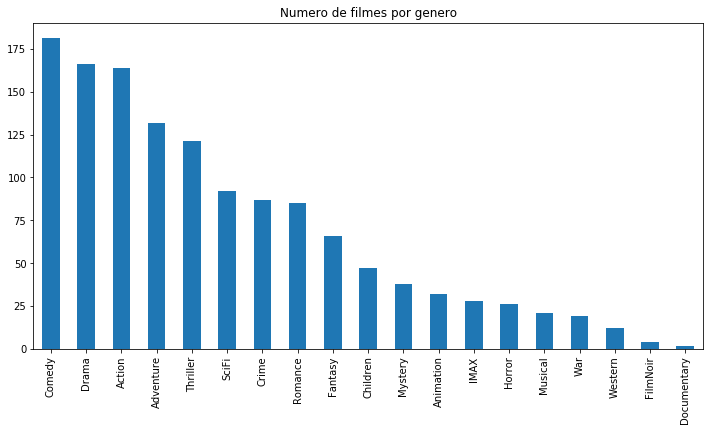

In [0]:
# solução
numero_de_filmes_por_genero = generos.sum().sort_values(ascending = False)
numero_de_filmes_por_genero.plot.bar(title = "Numero de filmes por genero", figsize = (12,6), xlim = 20)


## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = numero_de_filmes_por_genero.head(5)

In [0]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [0]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [0]:
# solucão
numero_de_votos_por_genero = votos_por_genero_por_filme.sum().sort_values()
numero_de_votos_por_genero

Documentary      108.0
FilmNoir         291.0
Western          900.0
Musical         1822.0
War             2113.0
Horror          2215.0
IMAX            2492.0
Animation       3066.0
Mystery         3452.0
Children        4331.0
Fantasy         5993.0
Romance         7444.0
Crime           8649.0
SciFi           8989.0
Thriller       11907.0
Adventure      13117.0
Comedy         15330.0
Drama          15445.0
Action         15734.0
dtype: float64

Text(0.5, 1.0, 'Número de votos por gênero')

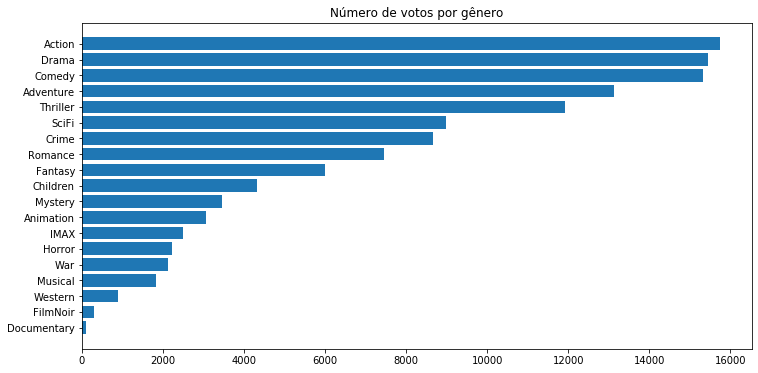

In [0]:
# solução

fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

ax.barh(numero_de_votos_por_genero.keys(), numero_de_votos_por_genero)
ax.set_title('Número de votos por gênero')

In [0]:
top5_generos_em_quantidade_de_votos = numero_de_votos_por_genero.tail(5).sort_values(ascending=False)
top5_generos_em_quantidade_de_votos

Action       15734.0
Drama        15445.0
Comedy       15330.0
Adventure    13117.0
Thriller     11907.0
dtype: float64

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [0]:
numero_de_votos_por_genero.head()

Documentary     108.0
FilmNoir        291.0
Western         900.0
Musical        1822.0
War            2113.0
dtype: float64

In [0]:
# solucao código
votos_por_filme_por_genero = (numero_de_votos_por_genero/numero_de_filmes_por_genero).sort_values(ascending = False)
votos_por_filme_por_genero

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

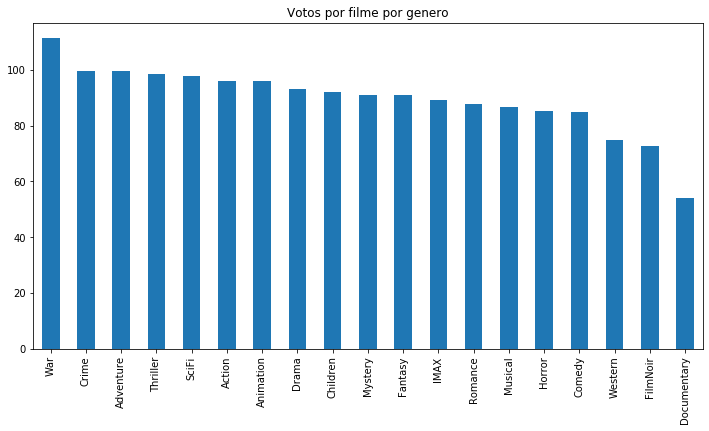

In [0]:
# solução com visualização 
votos_por_filme_por_genero.plot.bar(title = "Votos por filme por genero", figsize = (12,6), xlim = 20)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

## Pode-se concluir atráves das visualizações que existem mais filmes de Action do que de War, sendo Action a categoria mais visualizada, e que , apesar disso, War possui um maior numero de votos por filme

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna 
##`total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

{'boxes': [<matplotlib.lines.Line2D at 0x7fd99919fda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd99912d780>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd99913a198>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd99912de10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd99912d0f0>,
  <matplotlib.lines.Line2D at 0x7fd99913aba8>]}

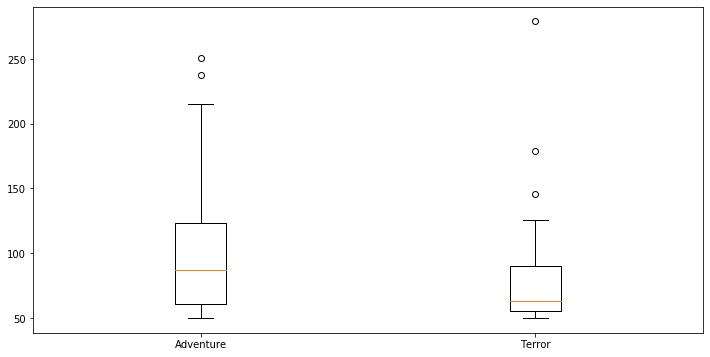

In [0]:
# solução:
plt.figure(figsize = (12,6))
plt.boxplot([filmes.total_de_votos[filmes.Adventure == 1],filmes.total_de_votos[filmes.Horror ==1]], labels = {"Adventure", "Terror"})

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5, 0, 'total de votos por filme')

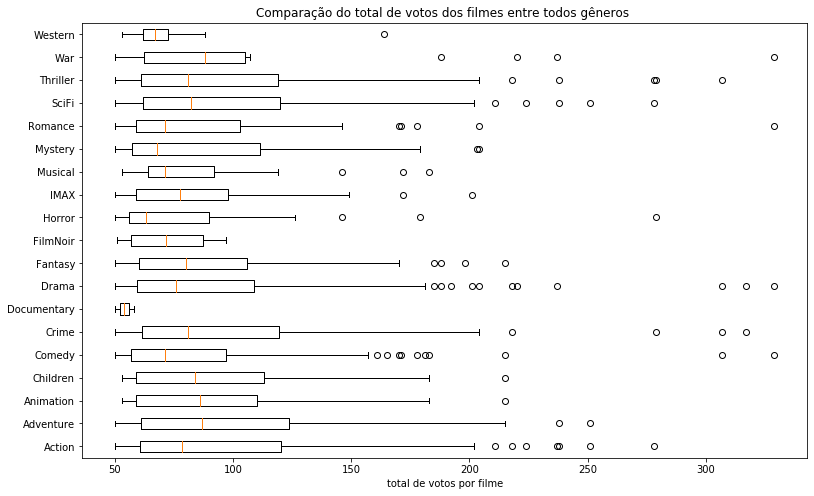

In [0]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot()

ax.boxplot([filmes[filmes[i] > 0].total_de_votos for i in generos.columns], vert=False, labels=generos.columns)
ax.set_title('Comparação do total de votos dos filmes entre todos gêneros ')
ax.set_xlabel('total de votos por filme')

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:  Adventure. Porque filmes do gênero Adventure normalmente possuem mais visualizações que os do gênero Horror, garantindo uma maior chance de faturamento que pague as contas. Fora que , filmes Adventure tendem a ter mais votos por gênero, garantindo que o filme, caso faça sucesso, chame a atenção de mais pessoas.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Total de votos')

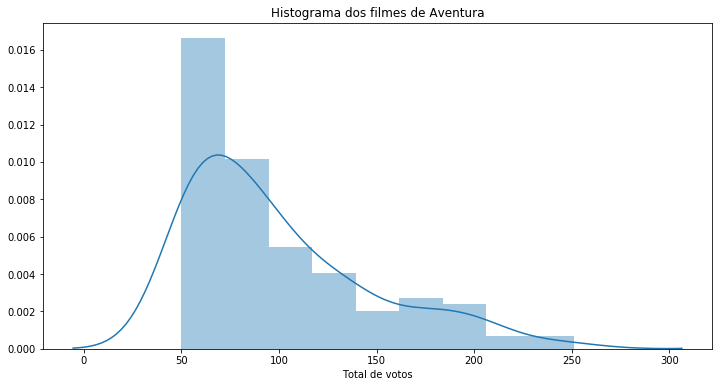

In [0]:
# solucao histograma de aventura
ax= sns.distplot(filmes.total_de_votos[filmes.Adventure == 1])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma dos filmes de Aventura")
ax.set_xlabel("Total de votos")

Text(0.5, 0, 'Total de votos')

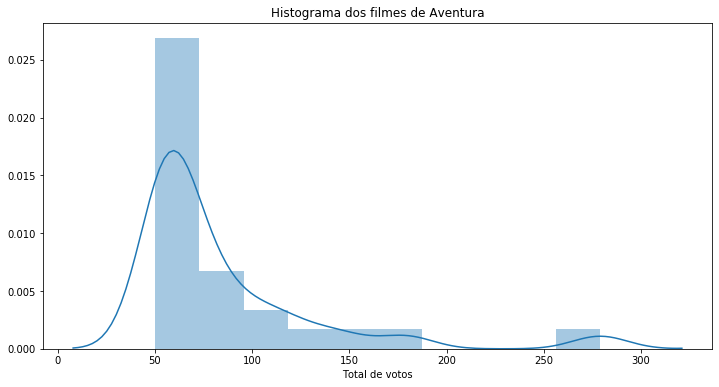

In [0]:
# solucao histograma de horror
ax= sns.distplot(filmes.total_de_votos[filmes.Horror == 1])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma dos filmes de Aventura")
ax.set_xlabel("Total de votos")



In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
stat_test1, p_value1 = normaltest(filmes.total_de_votos[filmes.Horror == 1])
stat_test2, p_value2 = normaltest(filmes.total_de_votos[filmes.Adventure == 1])
print("Para filmes de Horror os dados são : {:.2f} no stat_test e {:.3f} para p_value".format(stat_test1,p_value1))
print("Para filmes de Adventure os dados são : {:.2f} stat_test e {:.3f} para p_value".format(stat_test2,p_value2))

Para filmes de Horror os dados são : 31.74 no stat_test e 0.000 para p_value
Para filmes de Adventure os dados são : 24.05 stat_test e 0.000 para p_value


In [0]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(filmes.total_de_votos[filmes.Adventure==1],filmes.total_de_votos[filmes.Horror==1])
p

0.04782366231999856

### Solução (explique sua conclusão): De acordo com o  teste de normalidade, rejeitamos o fato das suas amostras seguirem distrubuições normais. Além disso, de acordo com o ranksums e o p-value obtido, pode-se concluir que , em média, os valores de uma distruibuição são maiores que os da outra



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

{'boxes': [<matplotlib.lines.Line2D at 0x7fd998e0e198>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd998e0eb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd998e19550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd998e19208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd998e0e4a8>,
  <matplotlib.lines.Line2D at 0x7fd998e19f28>]}

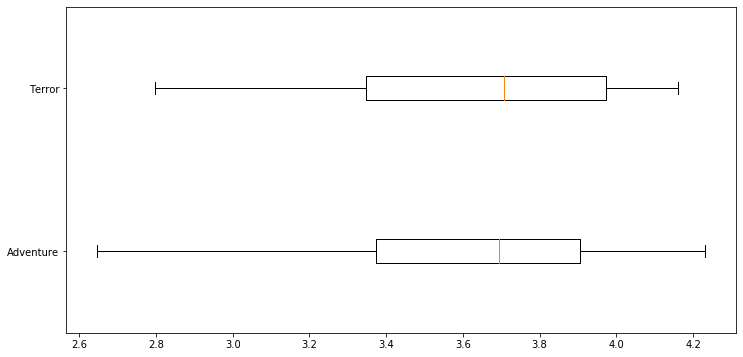

In [0]:
# solução:
plt.figure(figsize = (12,6))
plt.boxplot([filmes.nota_media[filmes.Adventure == 1],filmes.nota_media[filmes.Horror ==1 ]], labels = {"Adventure", "Terror"}, vert = False)


Text(0.5, 0, 'nota média por filme')

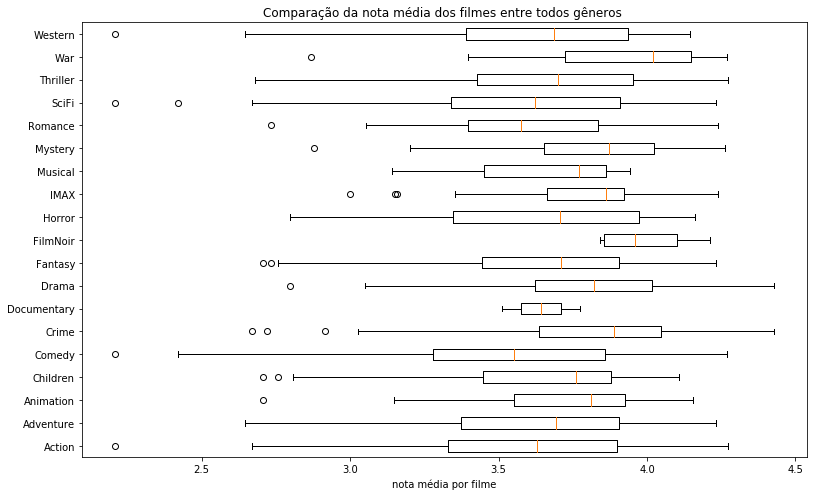

In [0]:
[filmes[filmes[i] > 0] for i in generos.columns]

fig = plt.figure(figsize=(13,8))
ax = plt.subplot()

ax.boxplot([filmes[filmes[i] > 0].nota_media for i in generos.columns], vert=False, labels=generos.columns)
ax.set_title('Comparação da nota média dos filmes entre todos gêneros ')
ax.set_xlabel('nota média por filme')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Adventure. Uma vez que ao analisarmos graficamente o boxplot , pode-se perceber que filmes do gênero Adventure tendem a ter uma quantidadae maior de votos com notas altas do que os filmes Horror



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Total de votos')

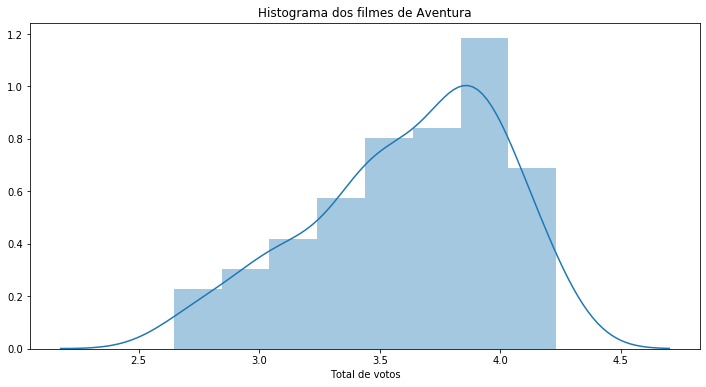

In [0]:
# solucao histograma de aventura
ax= sns.distplot(filmes.nota_media[filmes.Adventure == 1])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma dos filmes de Aventura")
ax.set_xlabel("Total de votos")

Text(0.5, 0, 'Total de votos')

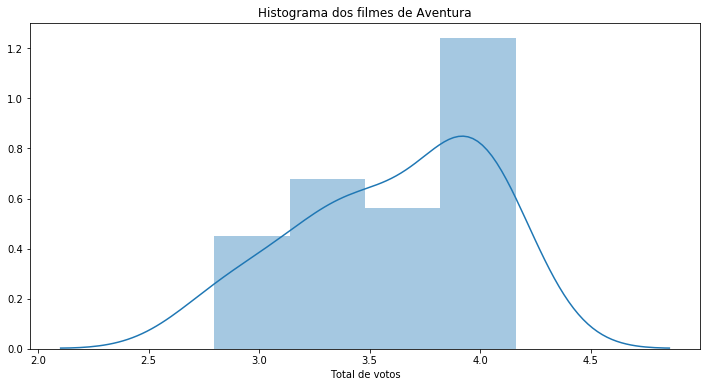

In [0]:
# solucao histograma de horror
ax= sns.distplot(filmes.nota_media[filmes.Horror == 1])
ax.figure.set_size_inches(12,6)
ax.set_title("Histograma dos filmes de Aventura")
ax.set_xlabel("Total de votos")


In [0]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, pvalue_nota_media_adventure = normaltest(filmes.nota_media[filmes.Adventure == 1])
_, pvalue_nota_media_horror = normaltest(filmes.nota_media[filmes.Horror ==1 ])

print("O p_value encontrado para os filmes de Horror é de {:.3f} e o p_value encontrado para filmes de Adventure é de {:.3f}".format(pvalue_nota_media_horror,pvalue_nota_media_adventure))

O p_value encontrado para os filmes de Horror é de 0.212 e o p_value encontrado para filmes de Adventure é de 0.013


In [0]:
# solução com o teste desejado
_, p = ranksums(filmes.nota_media[filmes.Adventure==1],filmes.nota_media[filmes.Horror==1])
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Após realizados os testes estátisticos, pode-se concluir que não é possível afirmar que um gênero é melhor do que o outro . Portanto, manteria minha indicação


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: Escolheria Adventure, uma vez que filmes do gênero Adventure tendem a ter mais visualizações que filmes do gênero Horror



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [0]:
numero_de_votos_por_genero
top2_generos = filmes.query('Action==1 or Drama==1')
top2_generos[['Action', 'Drama']]

,Action,Drama
filmeId,,
6,1,0
10,1,0
11,0,1
16,0,1
17,0,1
...,...,...
106782,0,1
109374,0,1
112852,1,0


In [0]:
# solução: calculando os 2 generos mais votados
# solução: encontrando os top 5 filmes desses generos
top5_filmes_actiondrama = top2_generos.sort_values('nota_media', ascending=False).head(5)
top5_filmes_actiondrama[['titulo', 'nota_media', 'total_de_votos', 'Action', 'Drama']]

,titulo,nota_media,total_de_votos,Action,Drama
filmeId,,,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0,0,1
858,"Godfather, The (1972)",4.289062,192.0,0,1
2959,Fight Club (1999),4.272936,218.0,1,1
1276,Cool Hand Luke (1967),4.271930,57.0,0,1
1221,"Godfather: Part II, The (1974)",4.259690,129.0,0,1


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [0]:
# solucao
filmes.corr().nota_media.sort_values(ascending = False)


nota_media           1.000000
total_de_votos       0.342584
Drama                0.277662
Crime                0.190220
Mystery              0.129914
War                  0.125615
FilmNoir             0.081766
IMAX                 0.064931
Animation            0.043071
Documentary         -0.003486
Musical             -0.008529
Thriller            -0.016782
Fantasy             -0.020986
Children            -0.030360
Horror              -0.033877
Western             -0.059642
Romance             -0.072002
Adventure           -0.079985
SciFi               -0.136717
Action              -0.154089
ano_de_lancamento   -0.159146
Comedy              -0.256005
Name: nota_media, dtype: float64

In [0]:
dois_generos_maior_correlacao_nota_media = ["Drama","Crime"]
dois_generos_menor_correolacao_nota_media = ["Action","Comedy"]

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [0]:
# solucao
filmes.corr().total_de_votos.sort_values(ascending = False)


total_de_votos       1.000000
nota_media           0.342584
Adventure            0.104380
War                  0.087999
Thriller             0.085525
Crime                0.079766
Action               0.066239
SciFi                0.063802
Animation            0.023442
Drama                0.018779
Children             0.001764
Mystery             -0.007051
Fantasy             -0.009976
IMAX                -0.016285
Musical             -0.024741
ano_de_lancamento   -0.028709
Horror              -0.036132
FilmNoir            -0.039408
Romance             -0.045427
Documentary         -0.055010
Western             -0.060789
Comedy              -0.128527
Name: total_de_votos, dtype: float64

In [0]:
dois_generos_com_maior_correlacao_total_de_votos = ["Adventure","War"]
dois_generos_com_menor_correlacao_total_de_votos = ["Western","Comedy"]

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0, 0.5, 'Nota média')

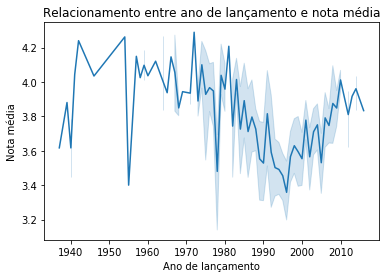

In [0]:
# solucao
ax = sns.lineplot(x = "ano_de_lancamento", y = "nota_media" , data = filmes)
ax.set_title("Relacionamento entre ano de lançamento e nota média")
ax.set_xlabel("Ano de lançamento")
ax.set_ylabel("Nota média")

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [0]:
# solução (código)
corr_ano_lancamento_e_nota_media = filmes.corr().ano_de_lancamento.nota_media
corr_ano_lancamento_e_nota_media

-0.1591455520444448

### Solução (explicação): O coeficiente de correlação mostra que quanto maior o ano de lançamento , menor são as notas médias. Acontece que, não existiam tantos filmes antigamente quanto existem hoje , podendo-se assim, gerar conclusões tendenciosas , uma vez que a nota_media se baseia em quantidade de votos no filme 



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

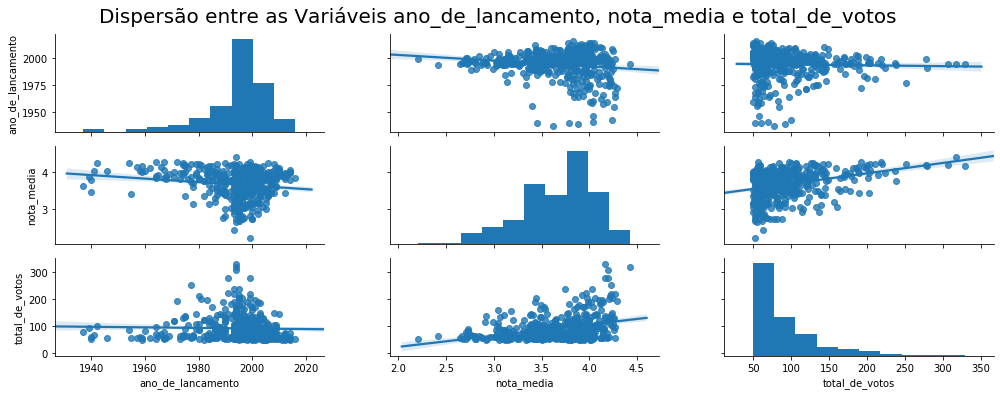

In [0]:
# solução
infos = ["ano_de_lancamento","nota_media","total_de_votos"]
ax = sns.pairplot(data = filmes , x_vars = infos, y_vars = infos, kind = "reg")
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media e total_de_votos',
                fontsize=20, y=1.05)
ax.fig.set_size_inches((15,5))
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

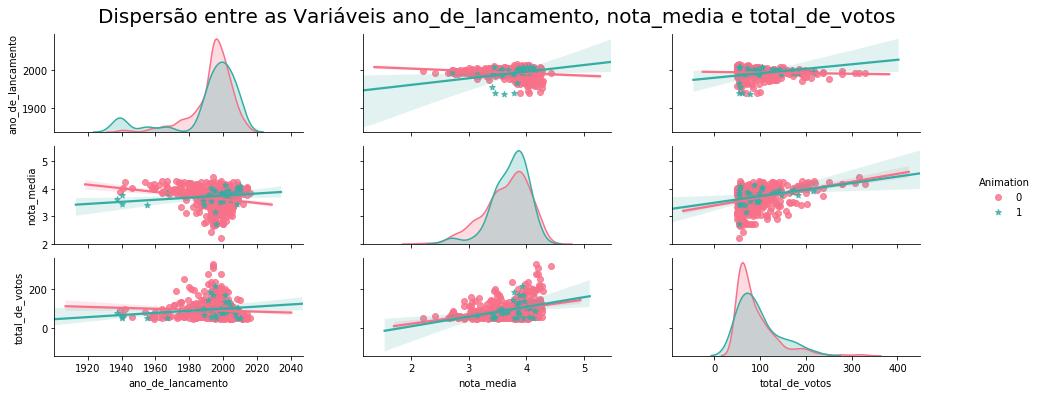

In [0]:
infos = ["ano_de_lancamento","nota_media","total_de_votos"]
ax = sns.pairplot(data = filmes , x_vars = infos, y_vars = infos, hue = "Animation", palette= "husl", kind = "reg", markers= ["o","*"])
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media e total_de_votos',
                fontsize=20, y=1.05)
ax.fig.set_size_inches((15,5))
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
1- Parece que a medida que o ano de lançamento aumenta, a nota média de filmes do gênero Animation aumenta. Visualmente , a correlação entre esses fatores parece ser linear

2 - Existe uma correlação positiva entre ambos, no entanto, aparenta ser uma relação não linear.

3 - Com relação aos outros filmes , no que tange a nota_media e o ano_de_lancamento,  parece existir uma relação negativa entre eles, uma vez que a medida que diminui-se o ano_de_lançamento, a nota_media  aumenta.

4 - Minha hipótese é que, a medida com que a tecnologia cresceu durante os anos, filmes do gênero Animation passaram a ter características visuais mais atrativas ao público, possibilitando filmes com resoluções gráficas mais agrádaveis. Com relaçao a outras categorias, nada pode-se afirmar com precisão, uma vez que existem poucos filmes produzidos com pequenos ano_de_lancamento.



## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [0]:
# solução
filmes_antigos = filmes.query("ano_de_lancamento <= 1990")
filmes_antigos.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
111,Taxi Driver (1976),1976.0,4.105769,104.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
541,Blade Runner (1982),1982.0,4.100806,124.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
586,Home Alone (1990),1990.0,2.995690,116.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
587,Ghost (1990),1990.0,3.434783,115.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0


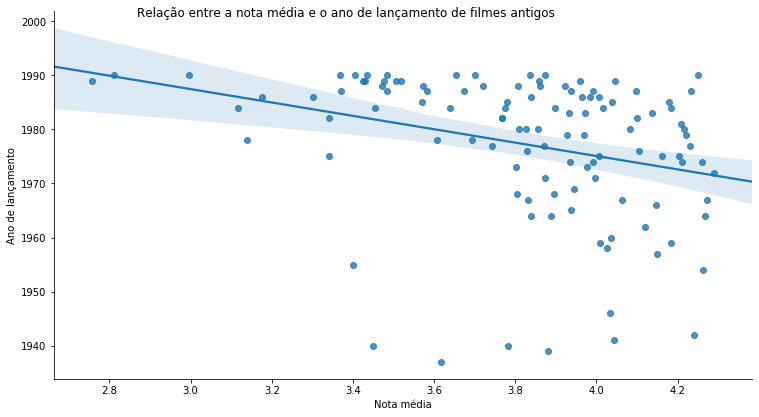

In [0]:
ax = sns.lmplot(x = "nota_media", y = "ano_de_lancamento", data = filmes_antigos)
ax.fig.suptitle("Relação entre a nota média e o ano de lançamento de filmes antigos")
ax.set_xlabels("Nota média")
ax.set_ylabels("Ano de lançamento")
ax.fig.set_size_inches(12,6)

In [0]:
filmes_antigos.nota_media.quantile(q=0.2)

3.5130131362889983

In [0]:
filmes.corr().nota_media.ano_de_lancamento

-0.1591455520444448

### **Conclusão** : Pôde-se analisar que filmes antigos possuem uma maior tendencia em terem notas medias maiores , uma vez que a maioria das notas destes filmes no dataset proposto encontram-se num patamar elevado. E que, a medida que o ano_de_lancamento aumenta, a nota_media diminui

Verificar se existe uma relação  positiva ou negativa entre a quantidade de filmes produzidos ao decorrer dos anos

In [0]:
anos_presentes_no_dataset = filmes.ano_de_lancamento.value_counts()
anos_presentes_no_dataset

1995.0    37
1994.0    28
1993.0    25
2000.0    24
1999.0    23
          ..
1981.0     1
1939.0     1
1966.0     1
2011.0     1
2013.0     1
Name: ano_de_lancamento, Length: 64, dtype: int64

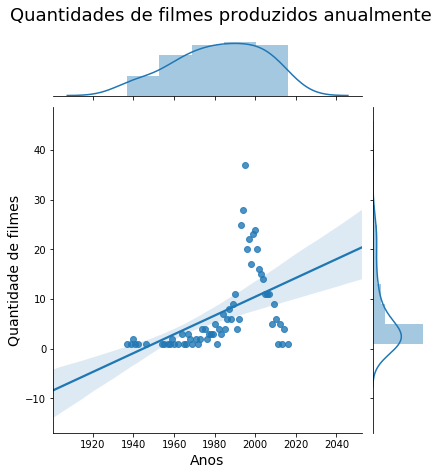

In [0]:
ax = sns.jointplot(x = anos_presentes_no_dataset.index , y = anos_presentes_no_dataset, kind = "reg")
ax.fig.suptitle("Quantidades de filmes produzidos anualmente", fontsize = 18, y = 1.05)
ax.set_axis_labels(xlabel = "Anos", ylabel = "Quantidade de filmes", fontsize = 14)

Conclusão : Através de uma análise gráfica proprorcionada pelo jointplot do seaborn, percebe-se que existe uma relação positiva entre o número de filmes e o ano_de_lançamento dos mesmos , o que, é totalmente justificavel uma vez que a indústria cinematográfica se tornou bastante popular nos dias atuais.